#  Exploratory factor analysis or EFA is a statistical technique 
used to reduce data to a smaller set of summary variables and 
to explore the underlying structure of a relatively large set of variables. 
It is used to identify the underlying relationships between measured variables. 
Each observed variable is considered as a potential measure of every factor, and 
the goal is to determine the strongest relationships

Question:
Exploratory Factor analysis is a useful technique to find latent factors that can potentially describe multiple attributes, 
which is sometimes very useful for dimensionality reduction. Use the Airline Passenger Satisfaction dataset to perform factor analysis. 
(Use only the columns that represent the ratings given by the passengers, only 14 columns). 
Choose the best features possible that helps in dimensionality reduction, without much loss in information.

__Airline Passenger Satisfaction dataset__

Dataset Link: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

# Sanatkumar Ippalpalli Eckovation Aug 15, 2020 , Batch -4 

In [1]:
#Import sklearn daatasets, model selection, neural network, numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# Preparing / loading Dataset 
#This dataset has already been split into train and test csv files. 
#80% of the total dataset is in train.csv and 20% is in test.csv
# Create Training & Testing Dataframes
train = pd.read_csv("train.csv")
print('Reading Training Dataset Complete')
test = pd.read_csv("test.csv")
print('Reading Testing Dataset Complete')

Reading Training Dataset Complete
Reading Testing Dataset Complete


In [3]:
# Estimate Shape of Training & Testing Dataset
print("Training Dataset Shape", train.shape)
print("Test Dataset Shape", test.shape)

Training Dataset Shape (103904, 25)
Test Dataset Shape (25976, 25)


In [4]:
# The head () function returns n rows from the DataFrame.
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [8]:
train.duplicated().sum()

0

In [9]:
train.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [10]:
train.loc[train["Customer Type"]=="disloyal Customer","Customer Type"]="Disloyal Customer"
train.loc[train["Type of Travel"]=="Business travel","Type of Travel"]="Business Travel"

In [11]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business Travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business Travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


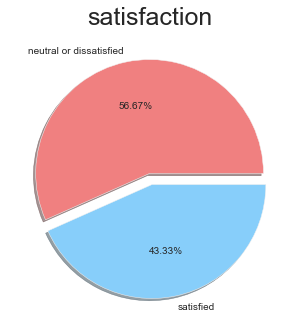

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,2)
plt.pie(train['satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"],
        explode=[0, 0.1], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('satisfaction', fontsize=25)

plt.show()

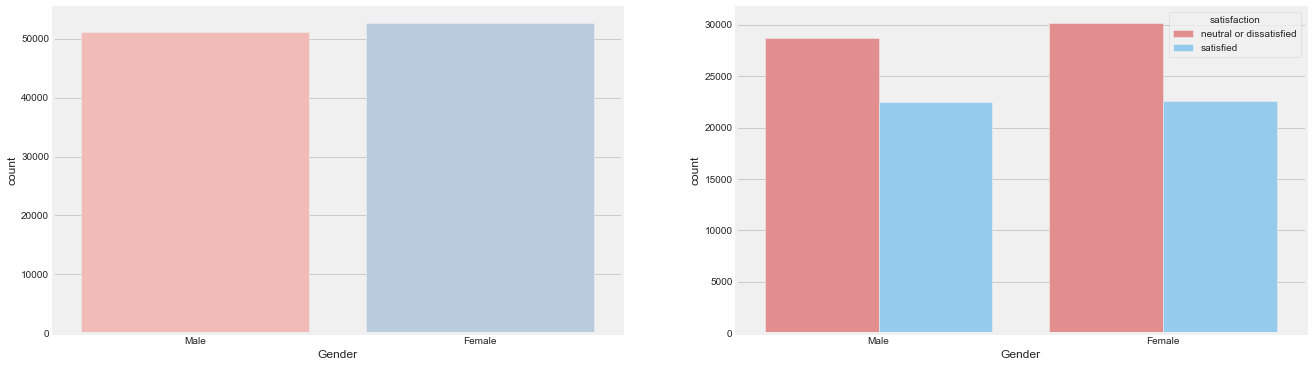

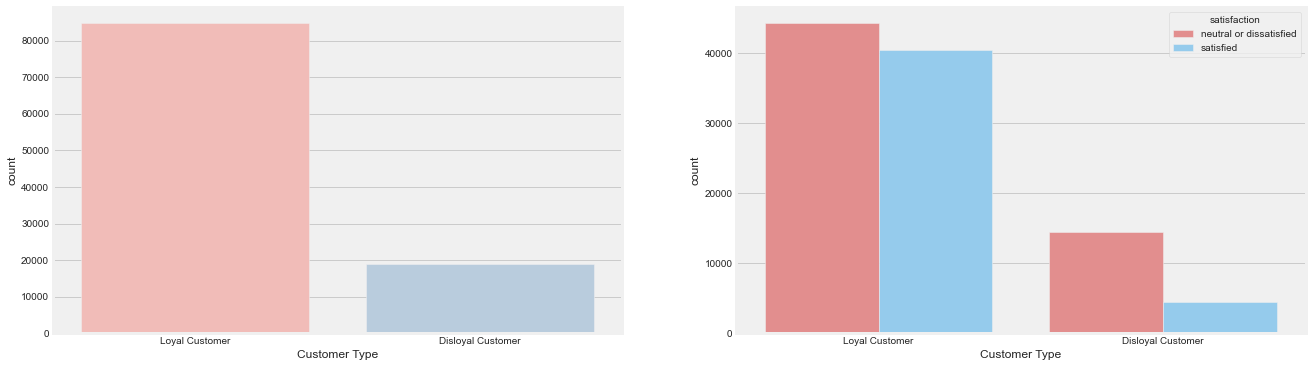

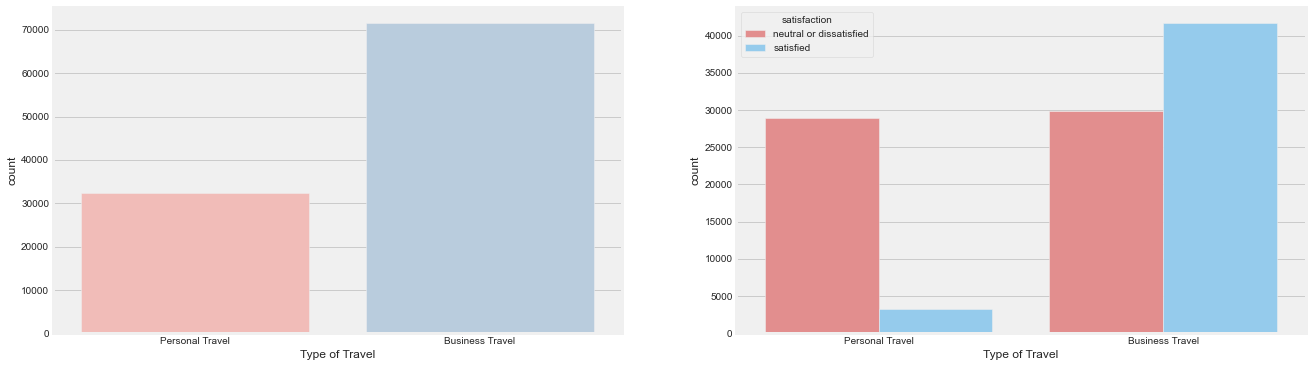

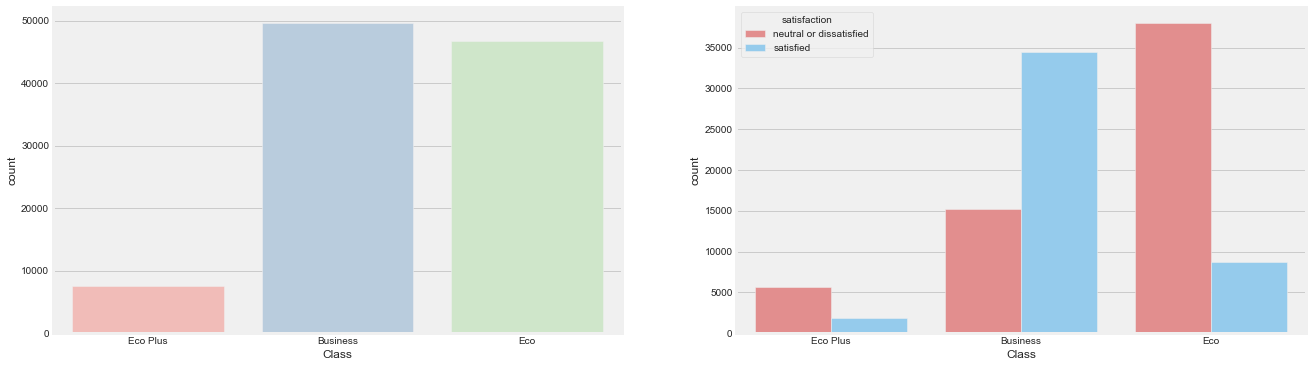

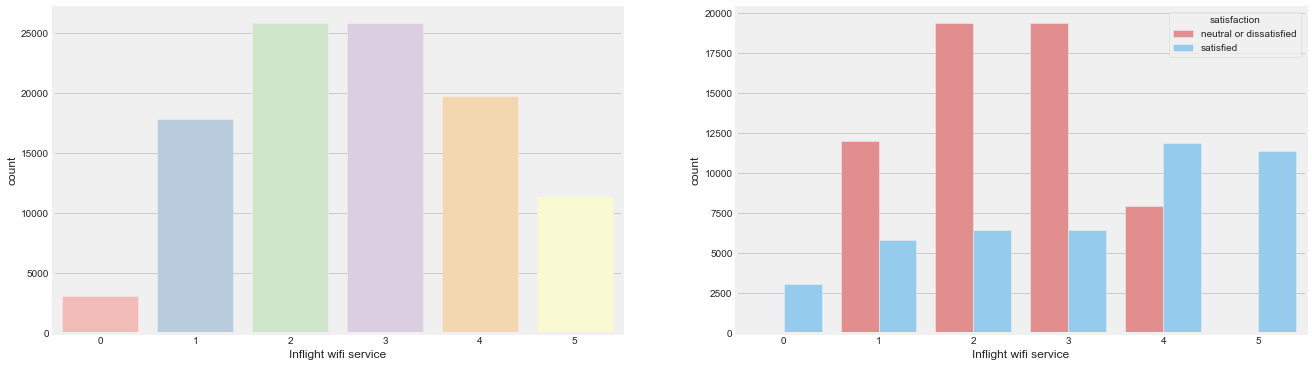

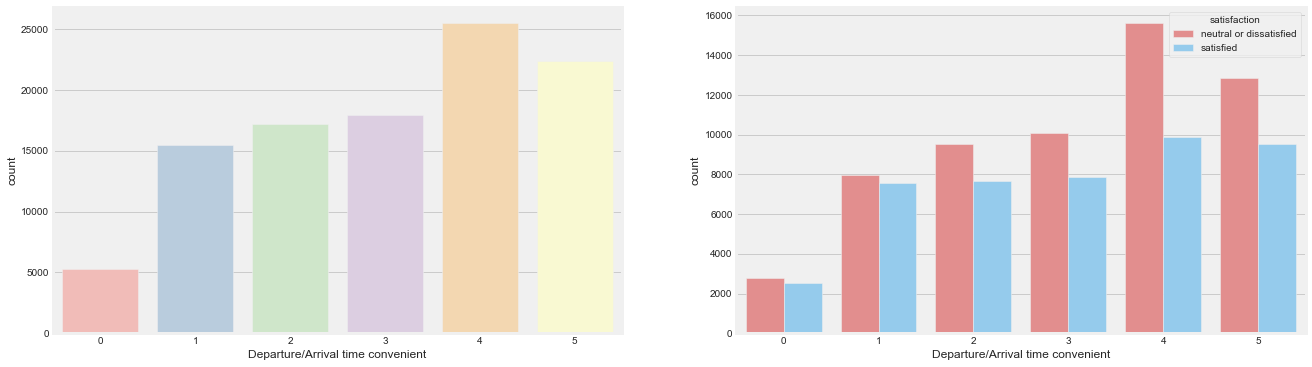

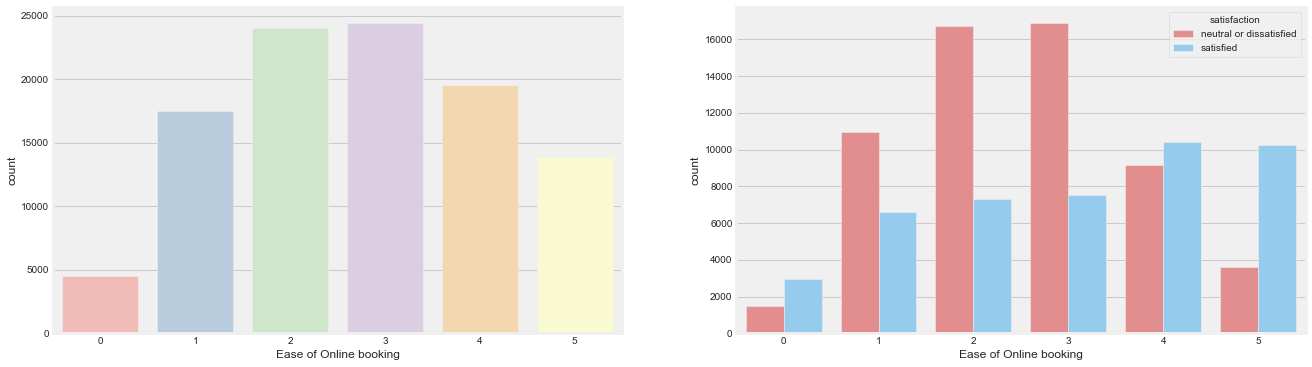

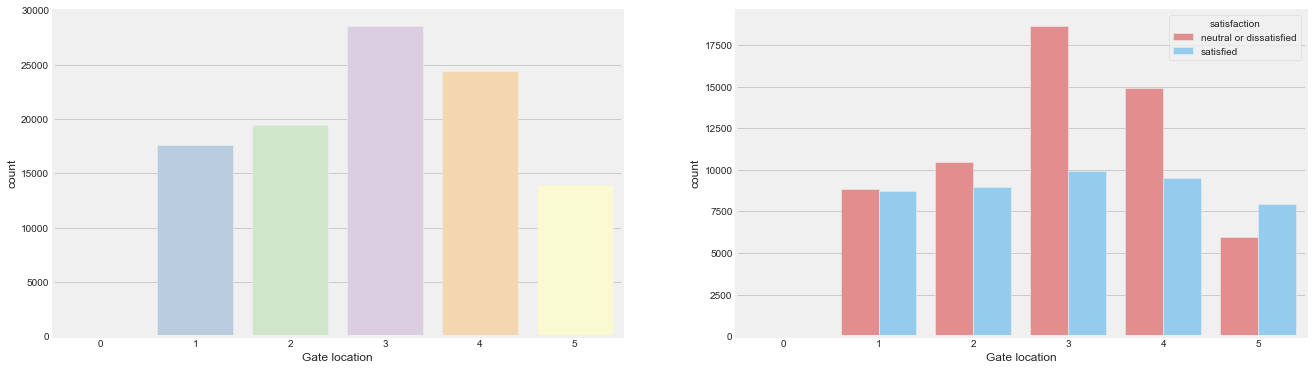

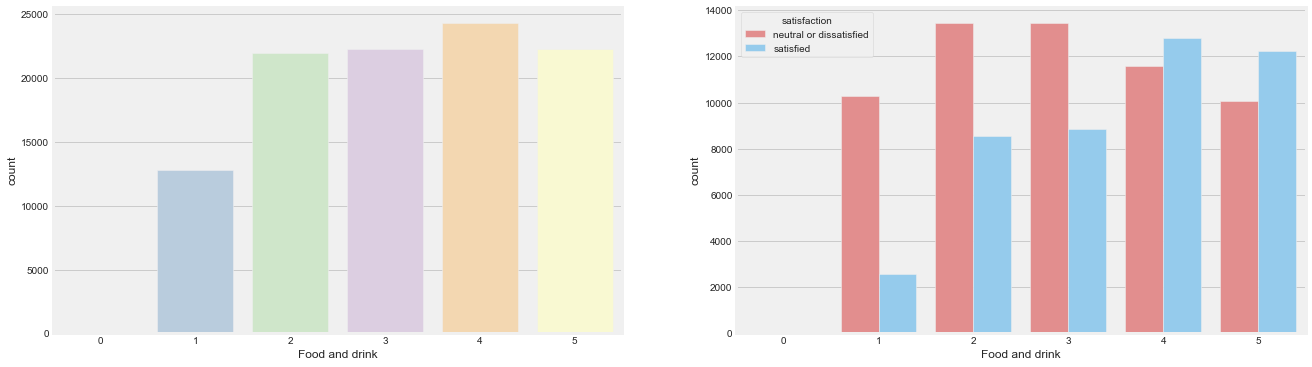

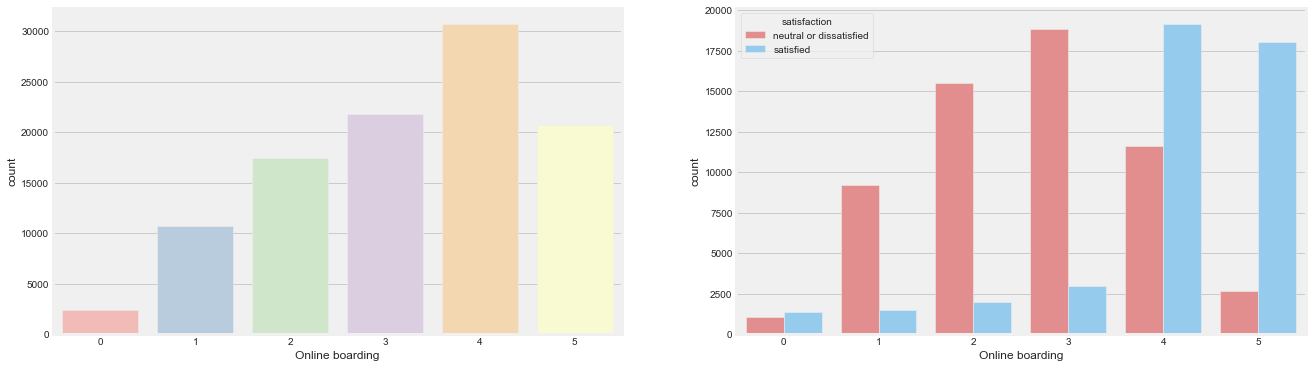

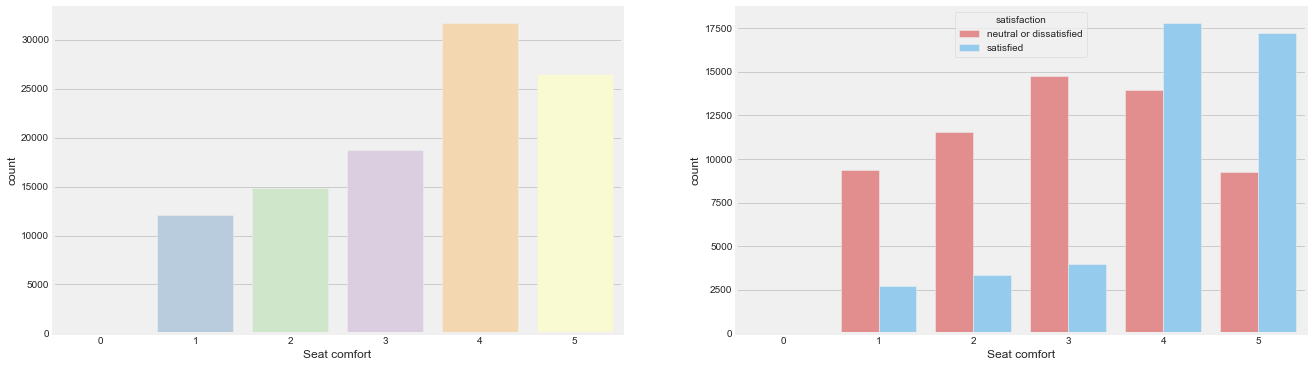

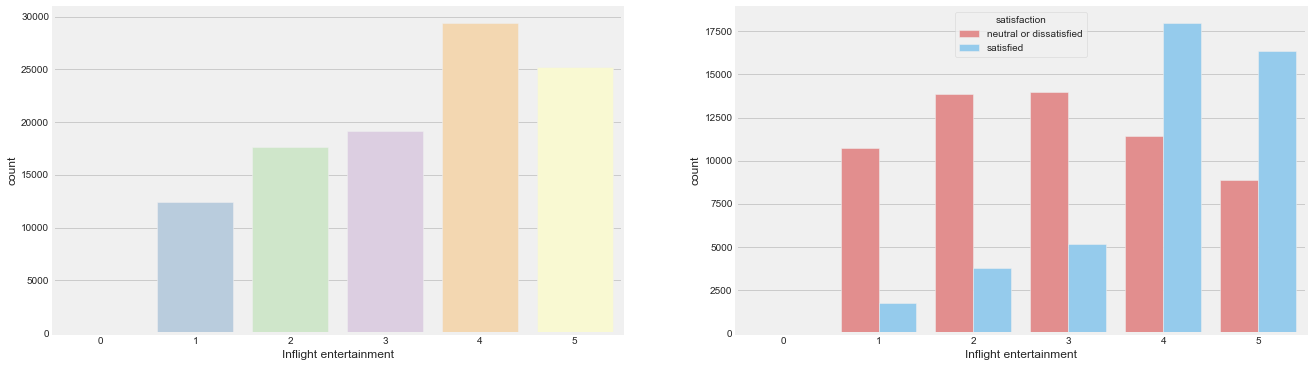

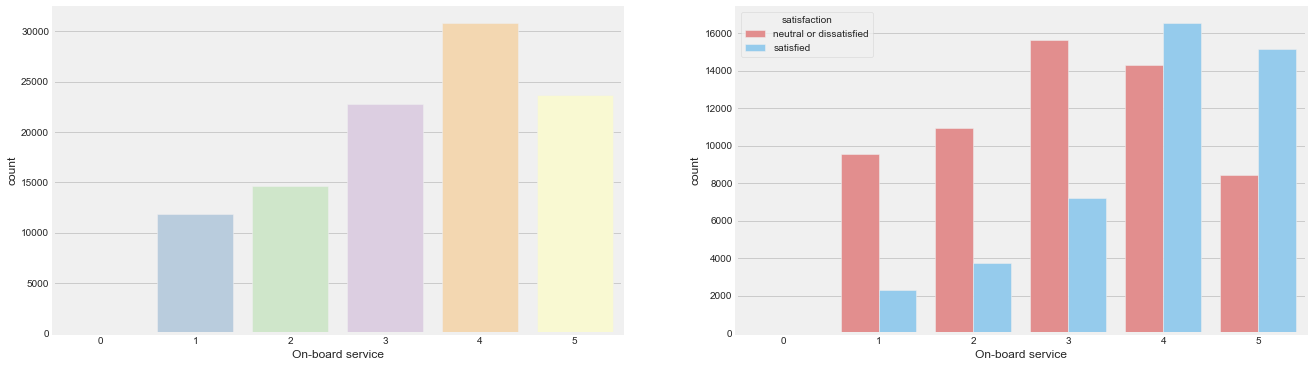

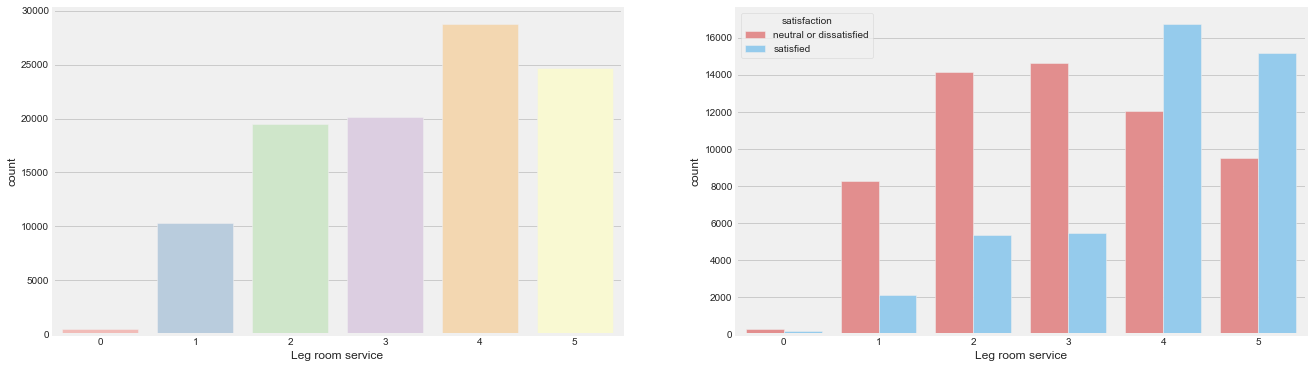

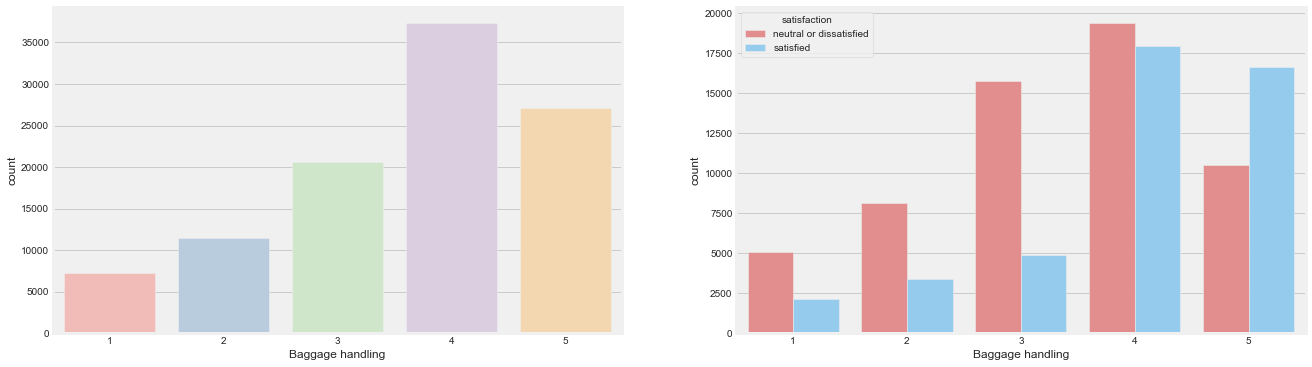

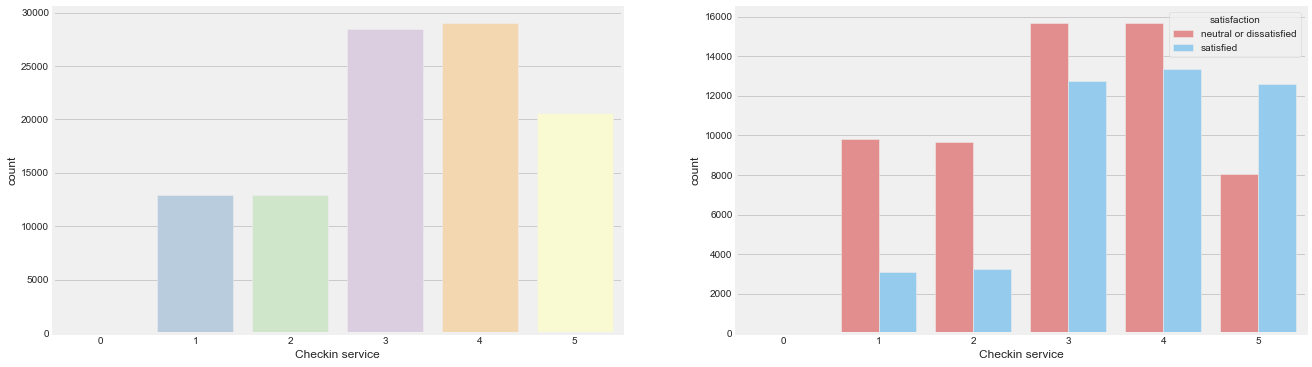

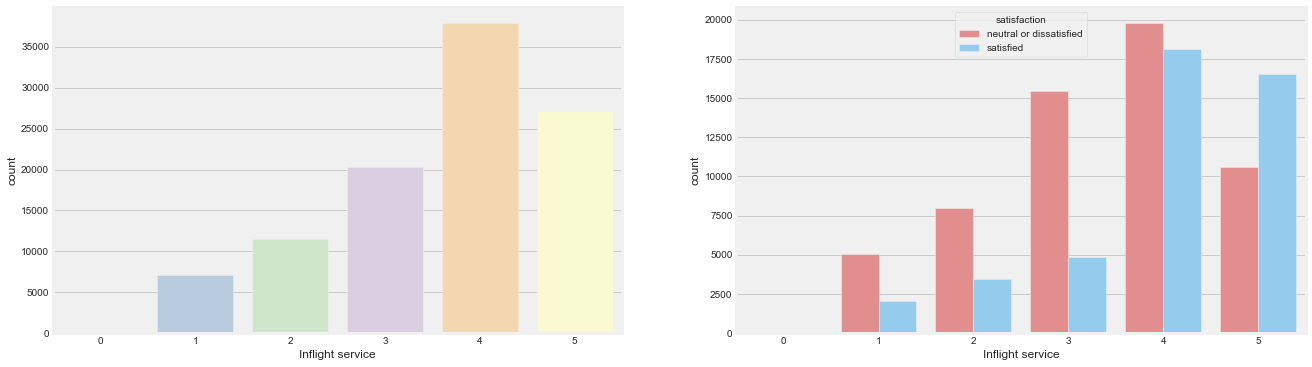

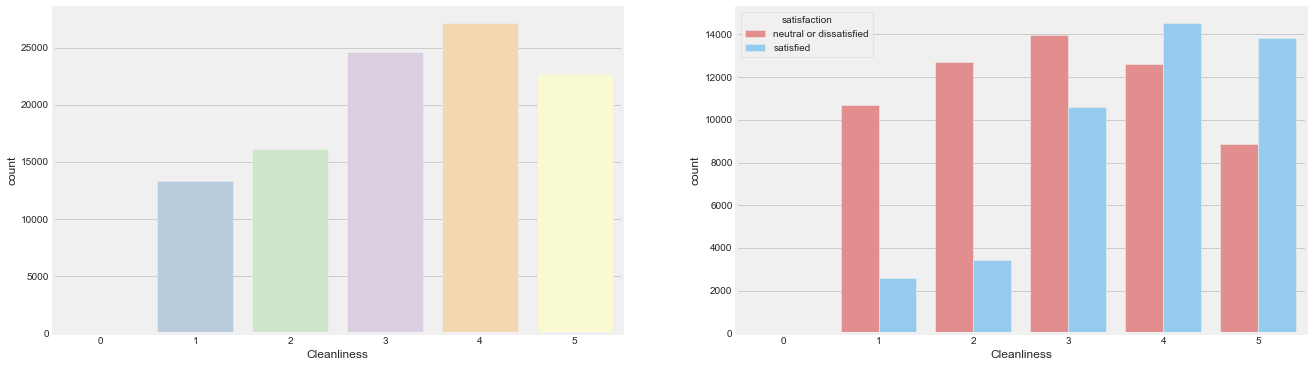

In [13]:
categories=['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in categories:
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.countplot(x=train[i],palette="Pastel1")
    
    plt.subplot(1,2,2)
    sns.countplot(x=train[i],hue=train.satisfaction, palette=["#f08080","#87cefa"])
    plt.show()

In [14]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(train):
    train = train.drop(['Unnamed: 0', 'id'], axis = 1)
    train['Gender'] = train['Gender'].apply(transform_gender)
    train['Customer Type'] = train['Customer Type'].apply(transform_customer_type)
    train['Type of Travel'] = train['Type of Travel'].apply(transform_travel_type)
    train['Class'] = train['Class'].apply(transform_class)
    train['satisfaction'] = train['satisfaction'].apply(transform_satisfaction)
    train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].median(), inplace = True)
    
    return train

train = process_data(train)
test = process_data(test)

In [15]:
# The head () function returns n rows from the DataFrame.
train.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,-1,25,-1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,-1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,-1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,-1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,1,1,26,0,0,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,0,1,47,0,0,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0
7,1,1,52,-1,2,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,1
8,1,1,41,-1,2,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,0
9,0,-1,20,-1,0,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,0


In [16]:
# The data analysis shall be done on the numerical parameters available. 
# Hence iloc is used to drop unnecessary columns
#X_train = train.iloc[:, 8:]
#X_test = test.iloc[:, 8:]
#print(X_train.shape)
#print(X_test.shape)
# Check size of the data set
#X_train.info()
# verifies all integer variables are selected
#X_train.head(10)

In [17]:
train[categories].mean().sort_values(ascending = False)

Inflight service                     3.640428
Baggage handling                     3.631833
Seat comfort                         3.439396
On-board service                     3.382363
Inflight entertainment               3.358158
Leg room service                     3.351055
Checkin service                      3.304290
Cleanliness                          3.286351
Online boarding                      3.250375
Food and drink                       3.202129
Departure/Arrival time convenient    3.060296
Gate location                        2.976883
Ease of Online booking               2.756901
Inflight wifi service                2.729683
Class                                1.028103
Customer Type                        0.634644
Gender                               0.507459
Type of Travel                      -0.689627
dtype: float64

In [18]:
#total = float(len(train))
#ax = train[categories].mean().sort_values(ascending=False).plot(kind="barh",ylabel="Features",colormap="Pastel1",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],figsize=(14,6))
#plt.title('Average satisfaction ratings of services', fontsize=16)
#for p in ax.patches:
#    count = '{:.1f}'.format(p.get_width())
#    x, y = p.get_x() + p.get_width()+0.15, p.get_y()
#    ax.annotate(count, (x, y), ha='right')
#plt.show()

In [19]:
#train_target = train.iloc[:, -1:]
#print(train_target.shape)
#np.unique(train_target.values, return_counts = True)

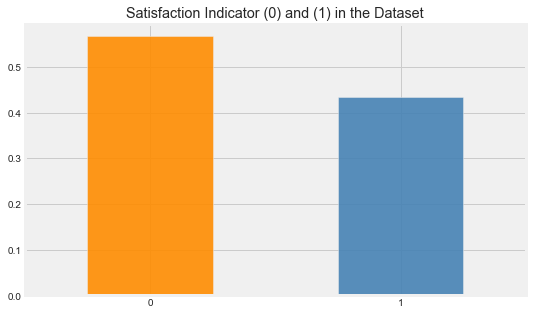

In [20]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

In [21]:
# Missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
satisfaction,0,0.0
Food and drink,0,0.0
Customer Type,0,0.0
Age,0,0.0
Type of Travel,0,0.0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [23]:
# Imputing missing value with mean
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].mean())
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].mean())

In [24]:
# Check the list of categorical variables
train.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [25]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer Type'] = test['Customer Type'].fillna(test['Customer Type'].mode()[0])
test['Type of Travel'] = test['Type of Travel'].fillna(test['Type of Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

#  Exploratory Factor Analysis

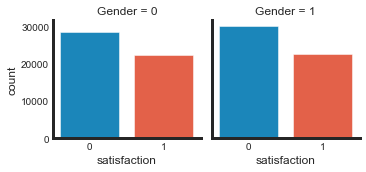

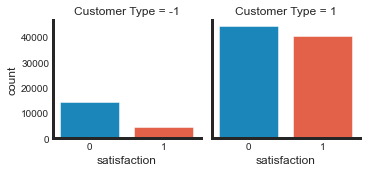

In [26]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)

Gender: It is observed that gender-wise distribution of dissatisfied and satisfied customers are quite same. For both male and female passengers, no. of dissatisfied customers are on the higher side compared to no. of satisfied customers.

Customer Type: Loyal passengers are very high in number. Even among loyal passengers, the ratio of satisfied and dissatidfied ones are almost 49:51.

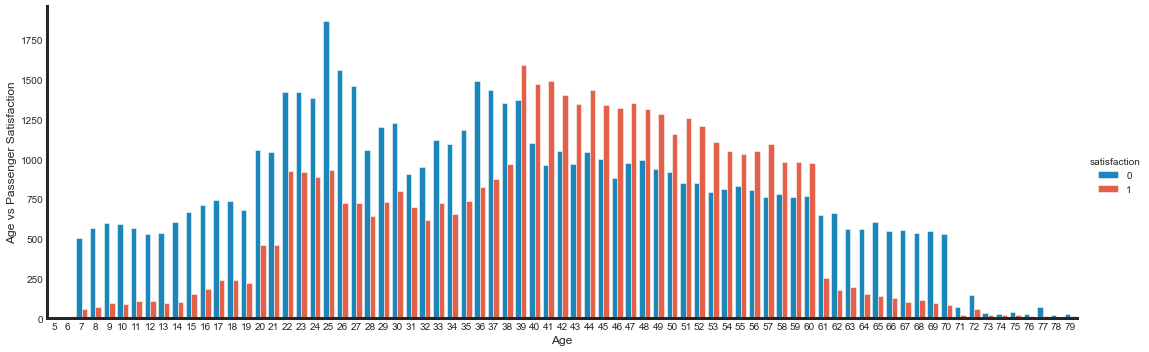

In [27]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

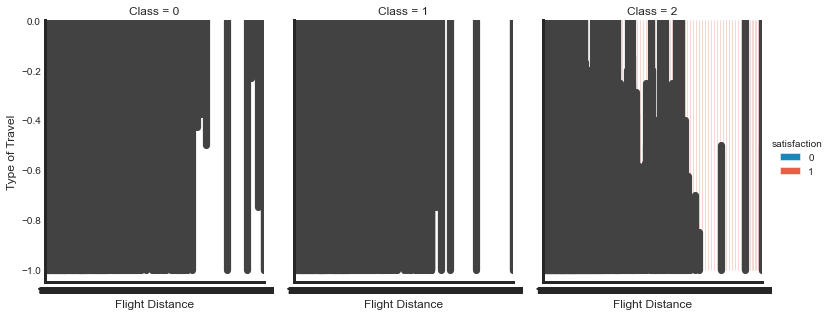

In [28]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

Type of Travel, Class, Flight Distance:
    For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.

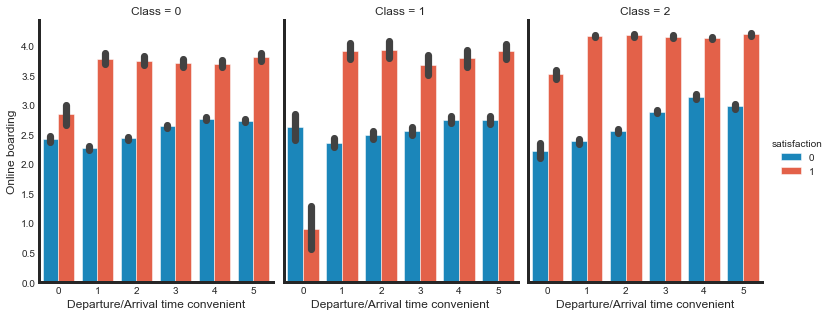

In [29]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival time convenient", y="Online boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

Online Boarding, Departure/Arrival Time Convenience grouped by Class: For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers.

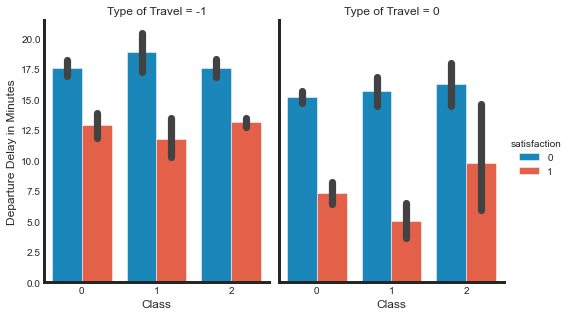

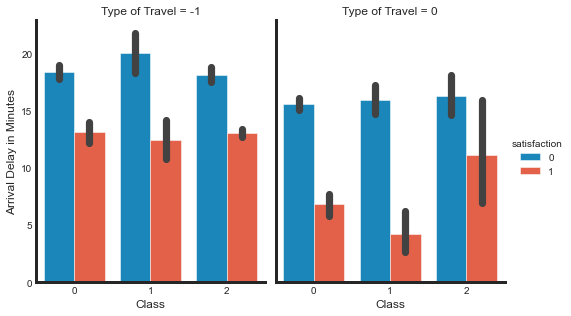

In [30]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar", height=4.5, aspect=.8)

Departure Delay, Arrival Delay grouped by Type of Travel: For personal travel (specially Eco Plus and Eco), the no. of dissatisfied passengers are really high when arrival delay in minutes is high. Now, this is quite obvious. By minute comparison, all combinations have higher no. of dissatisfied passengers compared to no. of satisfied passengers.

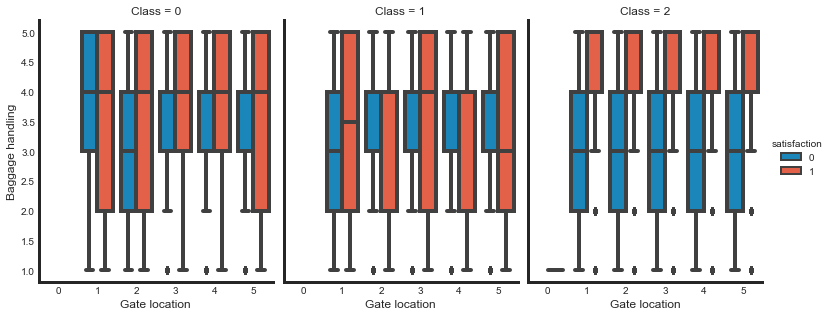

In [31]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate location", y="Baggage handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

Baggage Handling, Gate Location grouped by Class: For business class, it is observed that all gate locations have higher no. of dissatisfied passengers when baggage handling is not done perfectly well (rating <= 4). For Eco Plus, when the gate location is 1 and for Eco, when the gate location is 2, even when the baggages are handled in a mediocre way (rating in range 2.0 - 4.0), passengers remained dissatisfied.

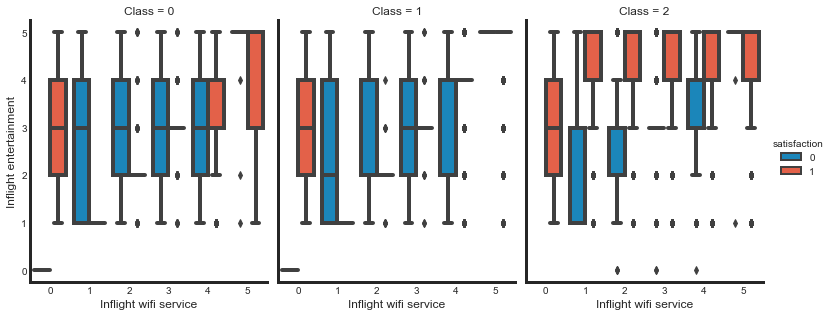

In [32]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

Inflight Entertainment, Inflight wi-fi Service grouped by Class: It is interesting to find that Eco Plus passengers are mostly satisfied without in-flight wi-fi service (rating 0) and medium level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can make them satisfied. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

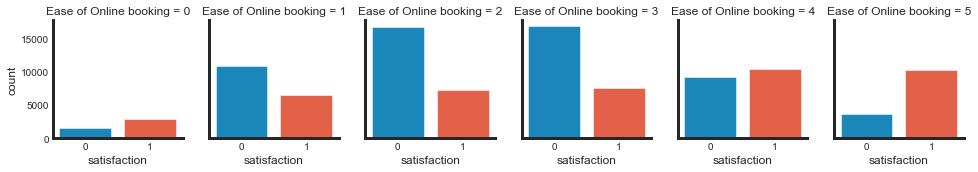

In [33]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease of Online booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

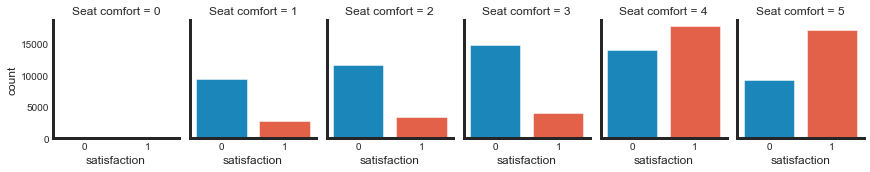

In [34]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

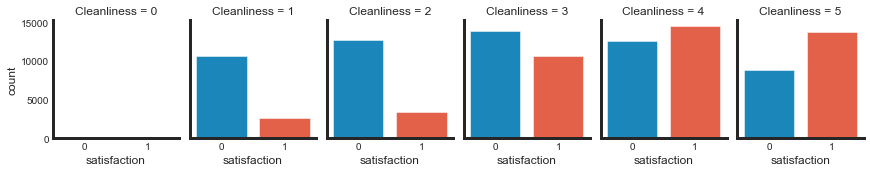

In [35]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

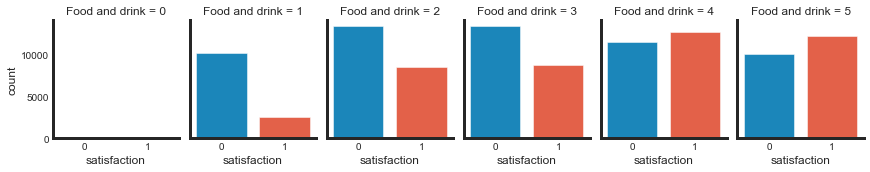

In [36]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food and drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

Ease of Online Booking, Seat Comfort, Cleanliness, Food and Drink: For all of these features, maximum no. of satisfied passengers belong to the category of 4 and 5 rating givers. Below rating 4, passengers are mostly dissatisfied.

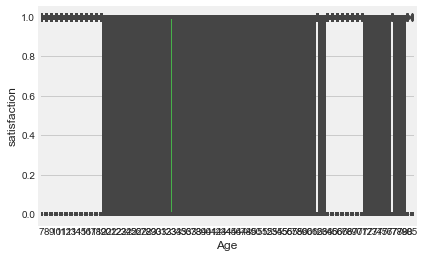

In [37]:
sns.boxplot(x="Age",y="satisfaction",data=train)
plt.show()

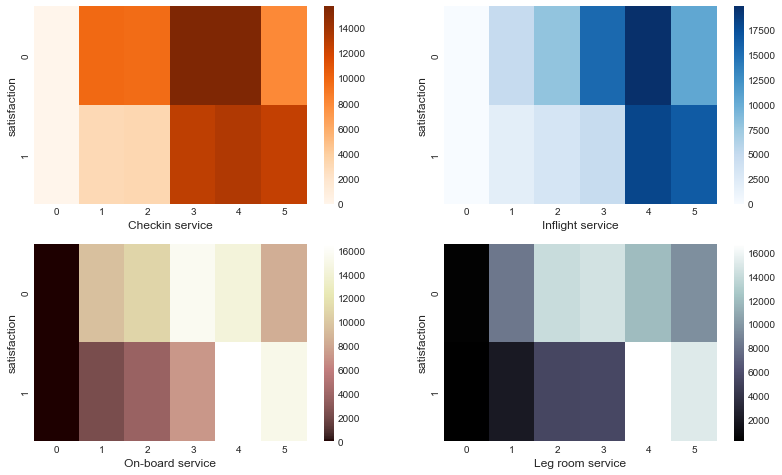

In [38]:
import matplotlib.pyplot as plt 
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Inflight service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Leg room service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

Checkin Service, Inflight Service, On-board Service, Leg-room Service: For checkin service, 0-2 rating givers are predominantly dissatisfied. For other three services, only 4 and 5 rating givers belong to satisfied passengers category.

# Label Encoding of Categorical Variables

In [39]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [40]:
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

# Outliers Detection and Removal

In [41]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer Type                           0.0
Age                                    24.0
Type of Travel                          1.0
Class                                   2.0
Flight Distance                      1329.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            3.0
Inflight entertainment                  2.0
On-board service                        2.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
satisfaction                    

In [42]:
# Removing outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

# Correlation among Features

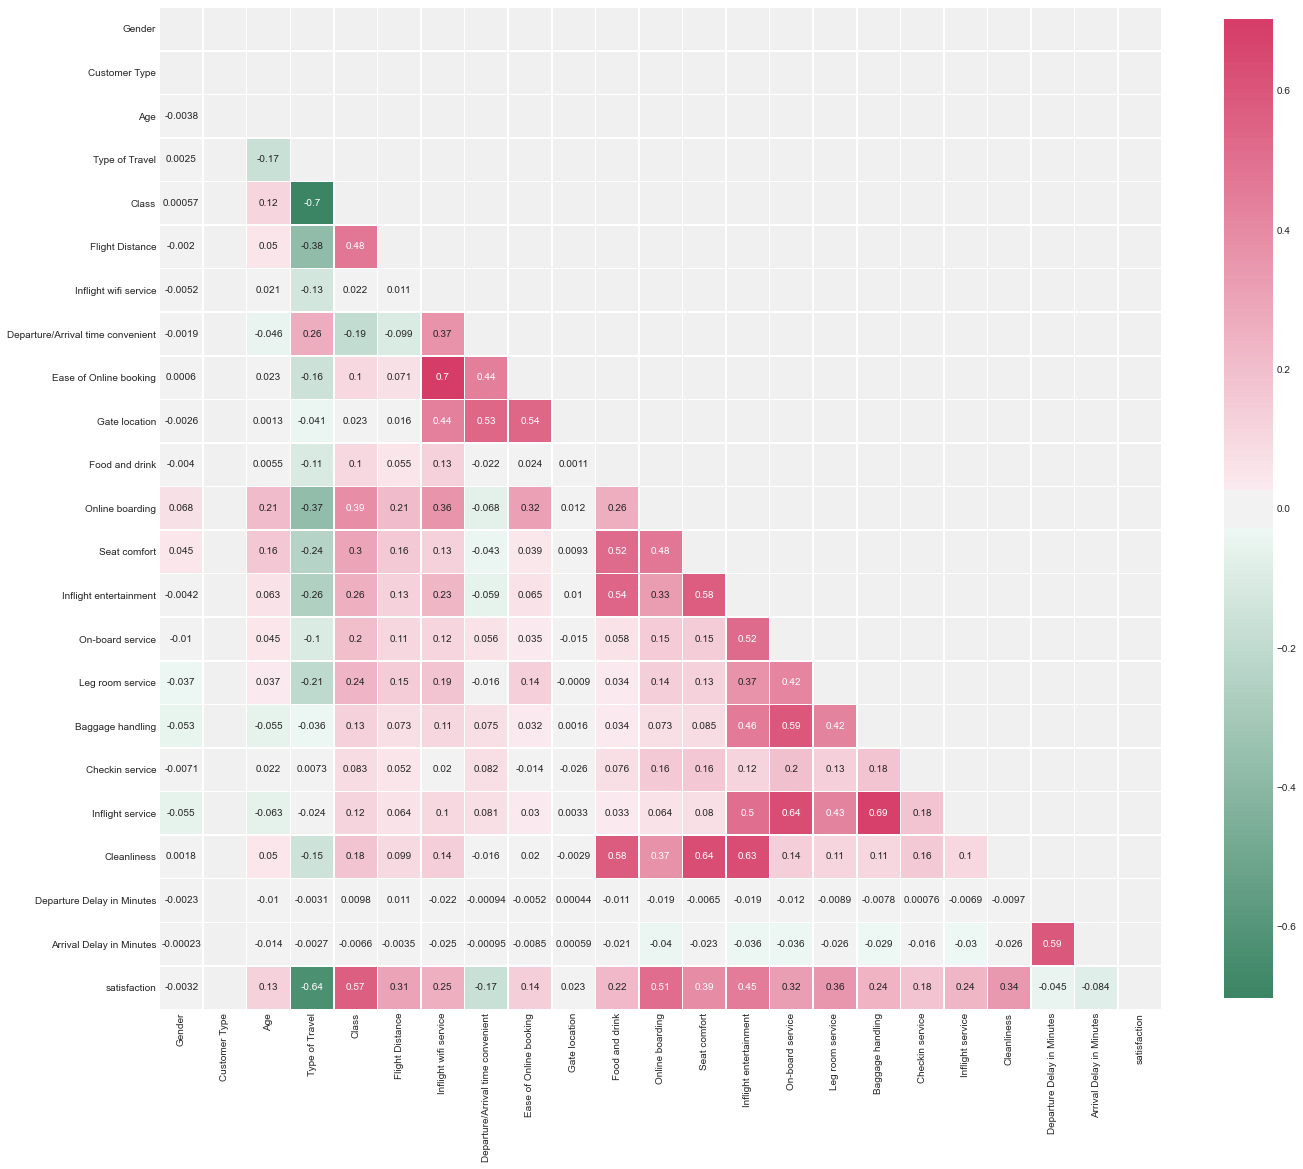

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service". Also "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corr. coefficient exactly equal to 1. So there is no perfect multicollinearity. Hence we are not discarding any variable.

# Top 10 Feature Selection through Chi-Square

In [44]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,0.0,0.076923,1.0,0.5,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,1.0,0.0,0.243590,0.0,1.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,0.0,0.0,0.692308,0.0,1.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,1.0,0.0,0.243590,1.0,0.0,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,0.0,0.0,0.512821,1.0,0.0,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [45]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Cleanliness'],
      dtype='object')


These are top 10 features impacting on passenger satisfaction. We will check feature importance with other methods as well.

# Feature Importance using Wrapper Method

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Leg room service']
[0.0040145  0.         0.02932359 0.20824927 0.08640664 0.03256264
 0.12328475 0.01908304 0.03031725 0.0143638  0.01168932 0.11081393
 0.06280333 0.06521192 0.02826119 0.04968917 0.02578668 0.02304806
 0.02278091 0.03659405 0.00707903 0.00863693]


So only these six features are inherently important in contributing towards passenger satisfaction. However, we will again cross-check with another feature importance deciding method.

# Feature Permutation Importance

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [49]:
import eli5
from eli5.sklearn import PermutationImportance

In [50]:
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.2743 ± 0.0038,Type of Travel
0.1281 ± 0.0029,Inflight wifi service
0.0429 ± 0.0012,Online boarding
0.0393 ± 0.0014,Seat comfort
0.0354 ± 0.0009,Checkin service
0.0310 ± 0.0008,Baggage handling
0.0293 ± 0.0013,Inflight service
0.0251 ± 0.0007,Cleanliness
0.0192 ± 0.0003,Class
0.0157 ± 0.0005,On-board service


From all above results, finally we can combine and conclude the list of important features.

**Really Important Features:** Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

**Important Features:** Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handling

# Building Models 

In [51]:
features = ['Type of Travel','Inflight wifi service','Online boarding','Seat comfort','Flight Distance',
            'Inflight entertainment','On-board service','Leg room service','Cleanliness','Checkin service', 
            'Inflight service', 'Baggage handling']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [52]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

**Model-1: Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)**

Accuracy = 0.5999384046812443
ROC Area under Curve = 0.60830237382349
Time taken = 0.41845703125
              precision    recall  f1-score   support

           0    0.68098   0.53977   0.60220     14573
           1    0.53504   0.67684   0.59765     11403

    accuracy                        0.59994     25976
   macro avg    0.60801   0.60830   0.59993     25976
weighted avg    0.61692   0.59994   0.60020     25976



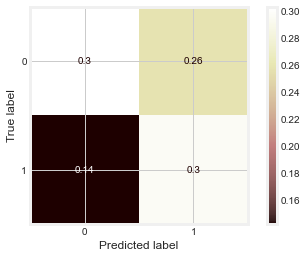

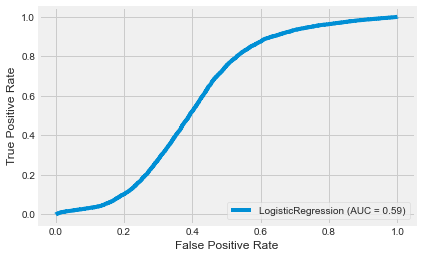

In [53]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Since Logistic Regression is a white-box model (explainable), we can dive deeper into it to get more insight. 


In [54]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.309527
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                61197
Model:                          Logit   Df Residuals:                    61185
Method:                           MLE   Df Model:                           11
Date:                Sun, 12 Sep 2021   Pseudo R-squ.:                  0.5533
Time:                        13:35:25   Log-Likelihood:                -18942.
converged:                       True   LL-Null:                       -42406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6437      0.016   -101.562      0.000      -1.675      -1.612
x2             0.2389      0.

We can see, among 12 features, except 1st & 6th feature , rest 10 features have p-value < 0.05. So these are really important features impacting highly towards the target variable. Also, a pseudo R-square value **(McFadden's Pseudo R-Squared Value)** of 0.55 represents an excellent fit. 

**Model-2: Naive Bayes Classifier**

Accuracy = 0.7270942408376964
ROC Area under Curve = 0.7285053467945617
Time taken = 0.05323457717895508
              precision    recall  f1-score   support

           0    0.77900   0.71694   0.74669     14573
           1    0.67168   0.74007   0.70422     11403

    accuracy                        0.72709     25976
   macro avg    0.72534   0.72851   0.72545     25976
weighted avg    0.73189   0.72709   0.72804     25976



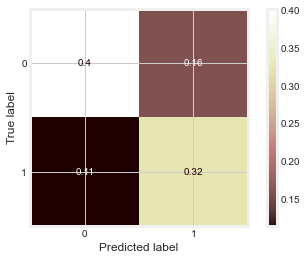

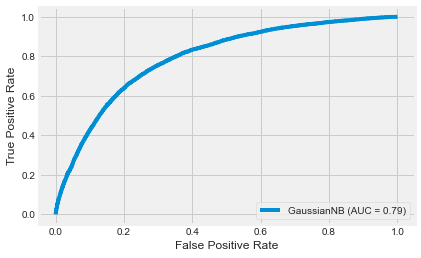

In [55]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

**Model-3: K-Nearest Neighbor Classifier**

Accuracy = 0.6470973206036341
ROC Area under Curve = 0.6383713966402076
Time taken = 10.083290815353394
              precision    recall  f1-score   support

           0    0.67685   0.70987   0.69297     14573
           1    0.60456   0.56687   0.58511     11403

    accuracy                        0.64710     25976
   macro avg    0.64071   0.63837   0.63904     25976
weighted avg    0.64512   0.64710   0.64562     25976



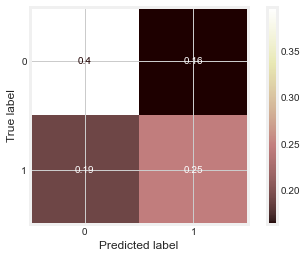

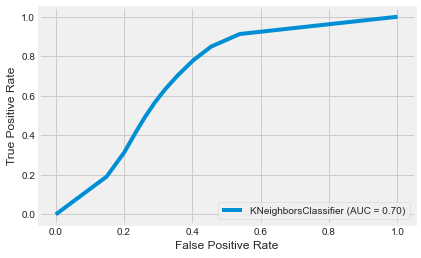

In [56]:
from sklearn.neighbors import KNeighborsClassifier

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

**Model-4: Decision Tree Classifier**

Accuracy = 0.587696335078534
ROC Area under Curve = 0.5622248672504708
Time taken = 0.07038664817810059
              precision    recall  f1-score   support

           0    0.60381   0.77095   0.67722     14573
           1    0.54702   0.35350   0.42947     11403

    accuracy                        0.58770     25976
   macro avg    0.57541   0.56222   0.55334     25976
weighted avg    0.57888   0.58770   0.56846     25976



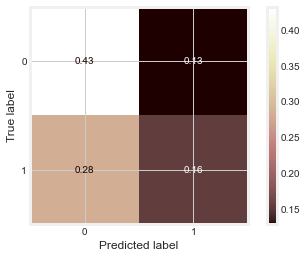

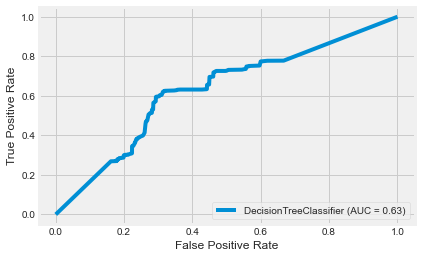

In [57]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Since Decision Tree is a white-box (explainable) model, we can deep-dive into its visualization to get more valuable insight below. From tree-visualization, we can extract rules which are contributing towards passenger-satisfaction.

**Model-5: Neural Network (Multilayer Perceptron)**

Accuracy = 0.557245149368648
ROC Area under Curve = 0.5646060094904605
Time taken = 20.51886558532715
              precision    recall  f1-score   support

           0    0.63212   0.50429   0.56101     14573
           1    0.49659   0.62492   0.55341     11403

    accuracy                        0.55725     25976
   macro avg    0.56435   0.56461   0.55721     25976
weighted avg    0.57262   0.55725   0.55768     25976



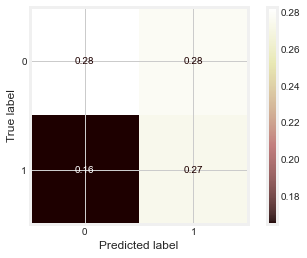

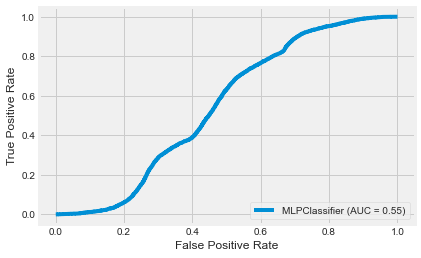

In [58]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

**Model-6: Random Forest**

Accuracy = 0.5268709578072066
ROC Area under Curve = 0.5074236658802531
Time taken = 3.964813709259033
              precision    recall  f1-score   support

           0    0.56656   0.66678   0.61260     14573
           1    0.44975   0.34807   0.39243     11403

    accuracy                        0.52687     25976
   macro avg    0.50815   0.50742   0.50251     25976
weighted avg    0.51528   0.52687   0.51595     25976



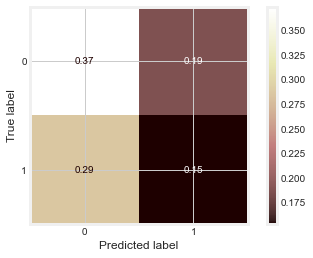

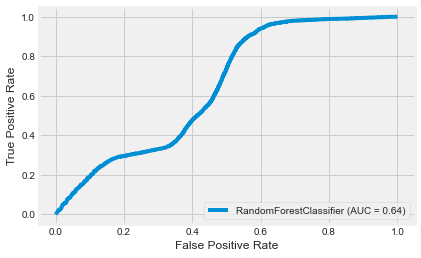

In [59]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Well, we see that Random Forest has performed very well on both Accuracy and area under ROC curve. So, we are now interested to see **how many decision trees are minimally required make the Accuarcy consistent** (recalling the fact that Random Forest is actually a bagged ensemble of decision trees).

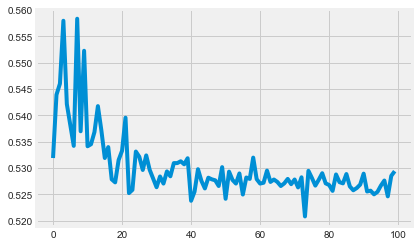

In [60]:
import numpy as np
%matplotlib inline

trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

From above graph, it is evident that **minimum 40 trees** are required to make accuracy fairly consistent (though minimal fluctuation is still there, and we can try the graph after increasing the no. of iterations).

**Model-7: Extreme Gradient Boosting**

In [61]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


[18:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.5421157991992609
ROC Area under Curve = 0.5264757585002433
Time taken = 22.426833629608154
              precision    recall  f1-score   support

           0    0.58167   0.65464   0.61600     14573
           1    0.47436   0.39832   0.43303     11403

    accuracy                        0.54212     25976
   macro avg    0.52802   0.52648   0.52451     25976
weighted avg    0.53456   0.54212   0.53568     25976



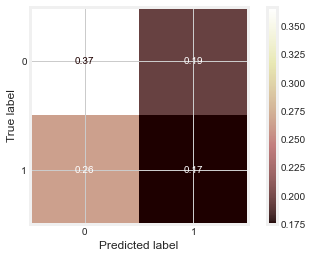

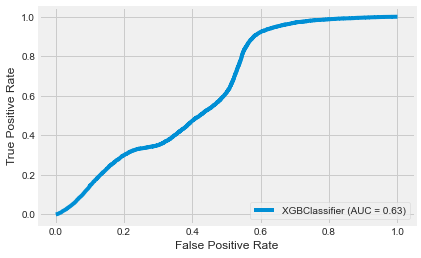

In [62]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

**Model-8: Adaptive Gradient Boosting**

Accuracy = 0.6578380043116723
ROC Area under Curve = 0.6423164237172053
Time taken = 19.939786434173584
              precision    recall  f1-score   support

           0    0.66977   0.76951   0.71618     14573
           1    0.63620   0.51513   0.56930     11403

    accuracy                        0.65784     25976
   macro avg    0.65298   0.64232   0.64274     25976
weighted avg    0.65503   0.65784   0.65170     25976



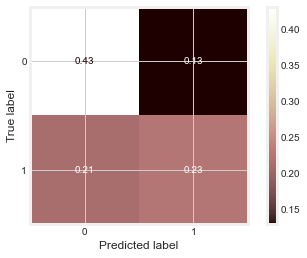

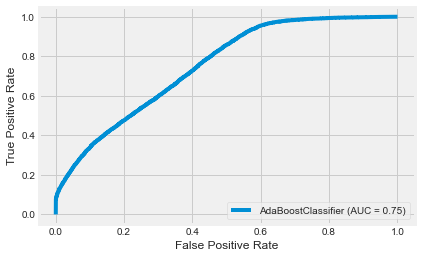

In [63]:
from sklearn.ensemble import AdaBoostClassifier as adab
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = adab(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

# Decision Region Plotting for Different Models

We will observe the boundary of decision regions plotted by all the models on training data. Also we will observe the number of misclassified data points in the plots.

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
pip install mlxtend

[18:45:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


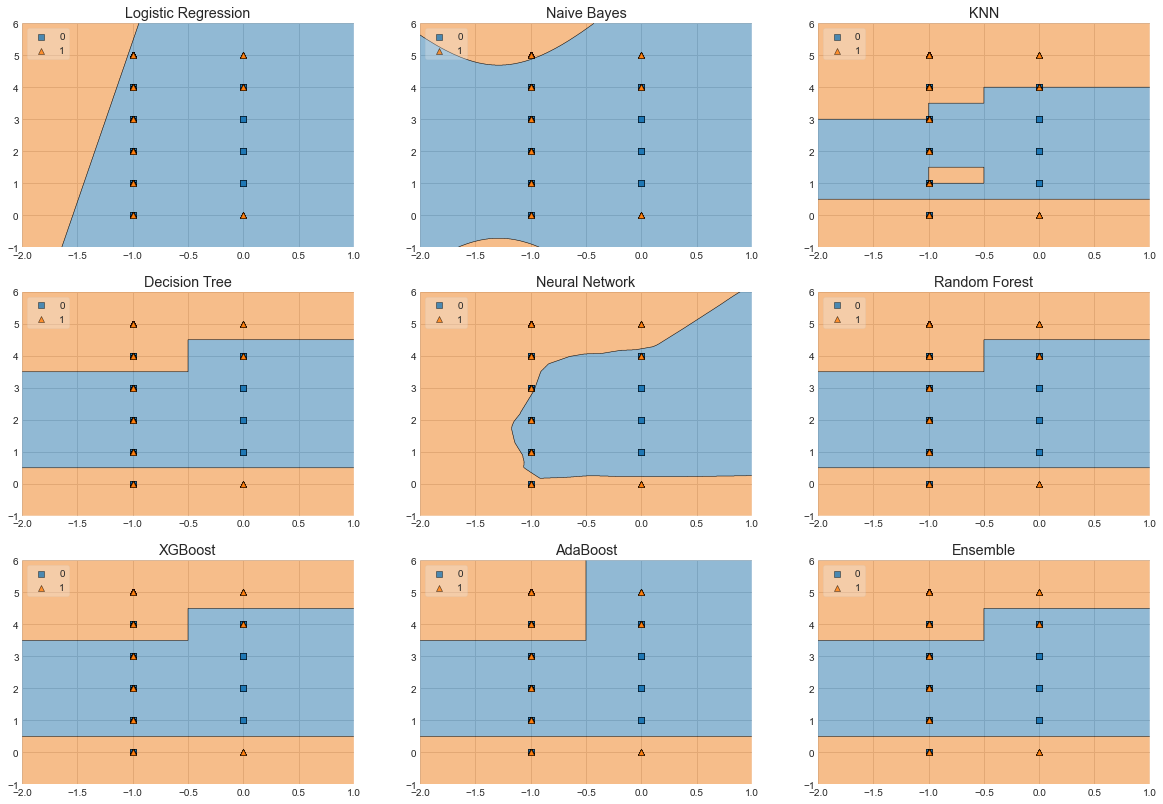

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mlxtend
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.70
width = 0.85

clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=12345) 
clf5 = MLPClassifier(random_state=12345, verbose = 0)
clf6 = RandomForestClassifier(random_state=12345)
clf7 = xgb.XGBClassifier(random_state=12345)
clf8 = AdaBoostClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf6, clf7, clf8], weights=[1, 1, 1], voting='soft')

X_list = train[["Type of Travel", "Inflight wifi service", "Online boarding", "Seat comfort"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = train["satisfaction"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Naive Bayes',
          'KNN',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'XGBoost',
          'AdaBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8,eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value, 3: value}, 
                                filler_feature_ranges={2: width, 3: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

# # Model Comparison:
We will compare the performace of various models by their respective ROC_AUC score and total time taken for execution.

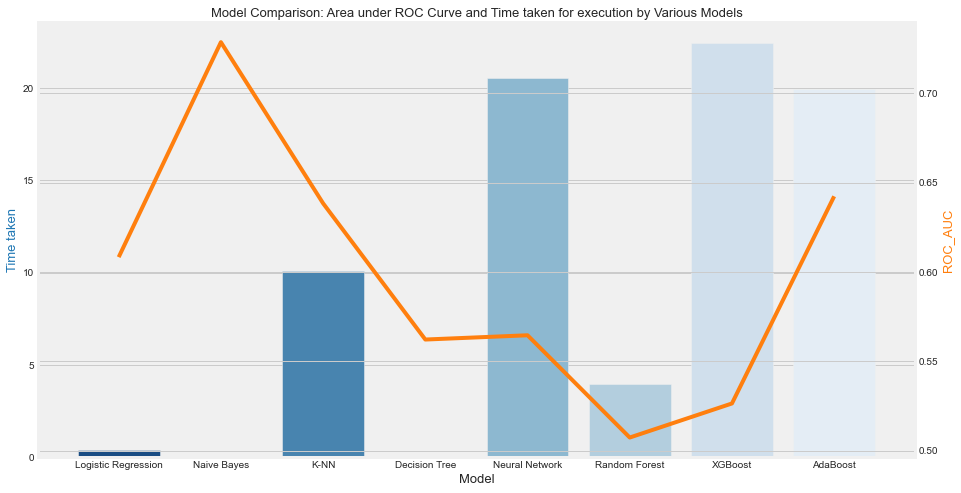

In [73]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

# Conclusion
We observe, Random Forest and AdaBoost have performed equally well on producing high ROC_AUC score (90%). But **Random Forest** has taken lesser amount of time compared to time taken by AdaBoost. So, we will stick to Random Forest as the best model.